In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Tiles

This is a dataset of otter skull morphology.

In [2]:
# uncomment the following:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
    gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


Make a bar chart of the museum column. What is this chart telling you?

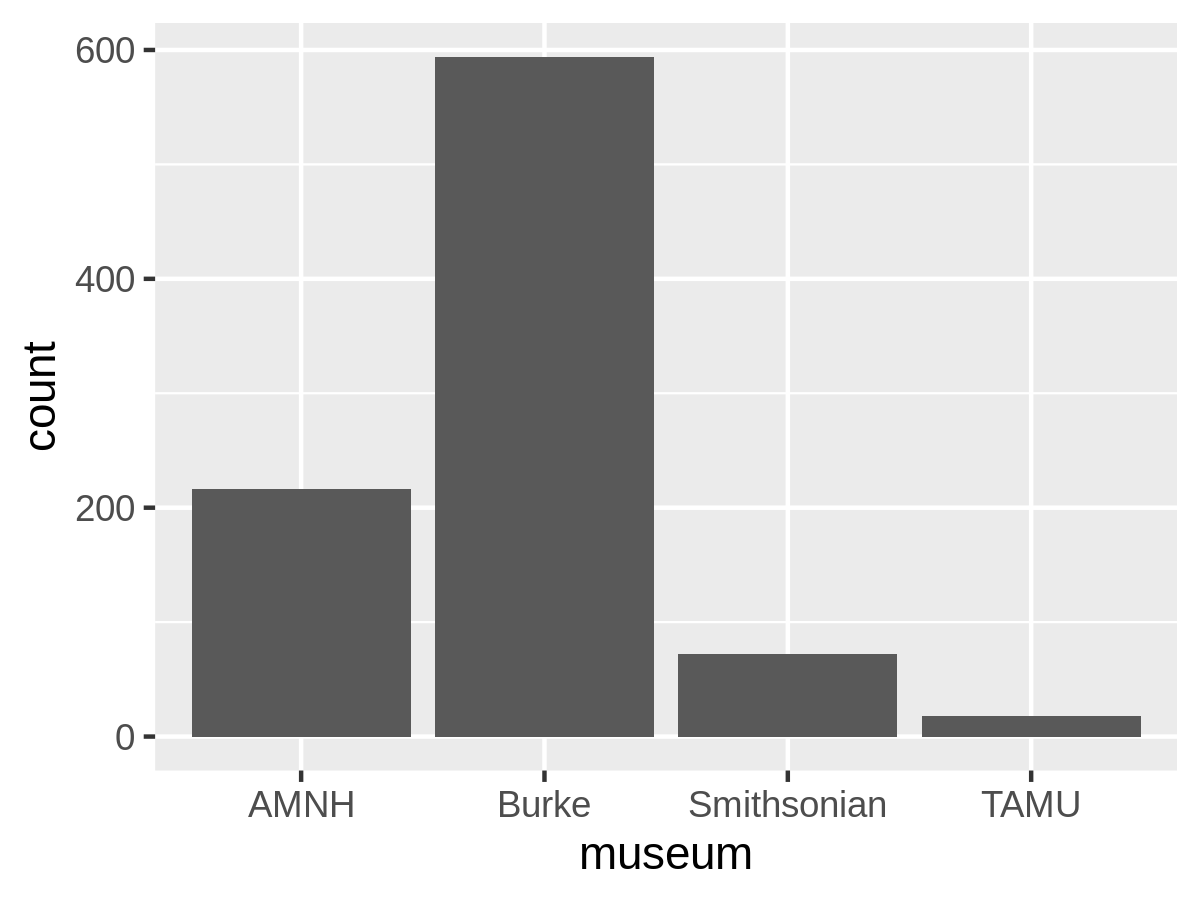

In [3]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)
p= ggplot(otter.data, aes(x=museum))
p=p+geom_bar()
p

This is telling us how many observations there are per museum

Make a heatmap of the data with `characteristic` on the x-axis and `species` on the y-axis.

In [4]:
# uncomment this to get a scaled version of the data:

otter.data.scaled = otter.data %>%
    group_by(characteristic) %>%
    mutate(value.scaled = scales::rescale(value))

otter.data.scaled %>% head

species,museum,accession,characteristic,value,value.scaled
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A. cinerea,AMNH,101458,m1,15.100,0.27867699
A. cinerea,AMNH,101461,m1,12.740,0.11259676
A. cinerea,AMNH,101466,m1,12.425,0.09042928
A. cinerea,AMNH,101635,m1,13.400,0.15904293
A. cinerea,AMNH,101459,m1,14.400,0.22941590
A. cinerea,AMNH,101462,m1,14.525,0.23821253


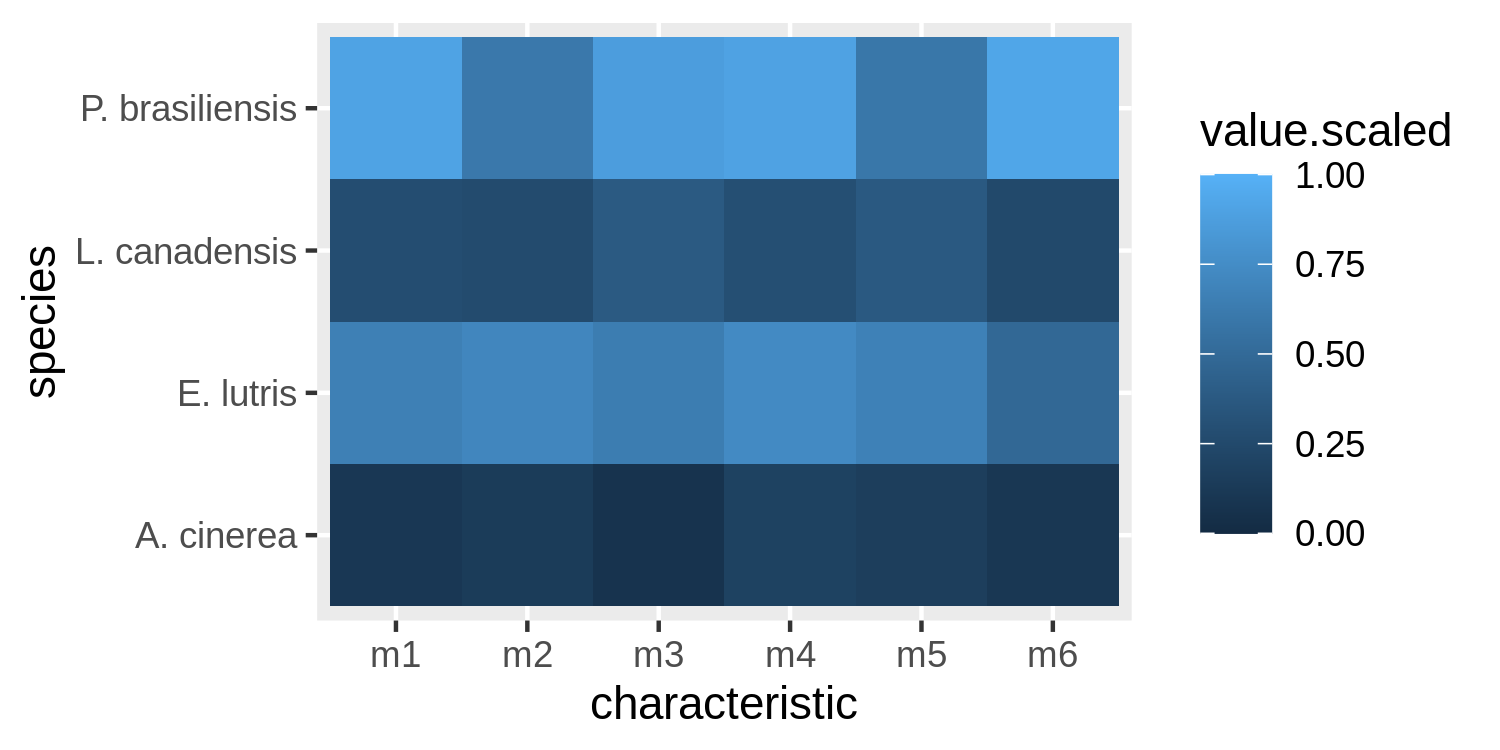

In [5]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)
g=ggplot(otter.data.scaled, aes(x=characteristic,y=species,fill=value.scaled))
g=g+geom_tile()
g

What can you do to make the chart more visually appealing?
- make the `color` white
- use `scale_fill_gradient(low = "white", high = "steelblue")`

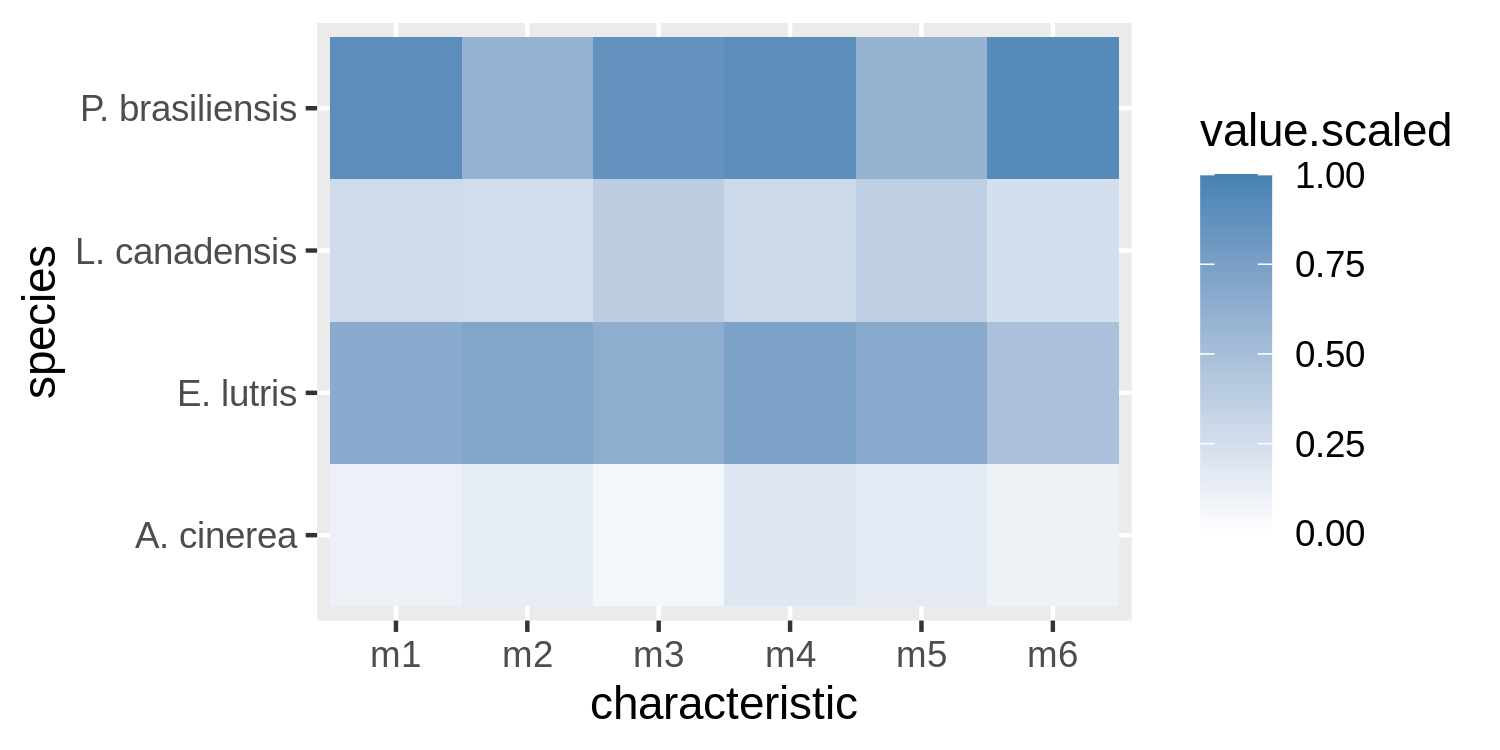

In [6]:
g=g+scale_fill_gradient(low="white", high ="steelblue")
g

# Points with jitter

Let's stick with the otter data. We could also use a point+jitter plot to represent the data. Make a point+jitter plot below with species on the x-axis, value on the y-axis, and facet the chart by characteristic. 

Warning message:
“Removed 5 rows containing missing values (geom_point).”


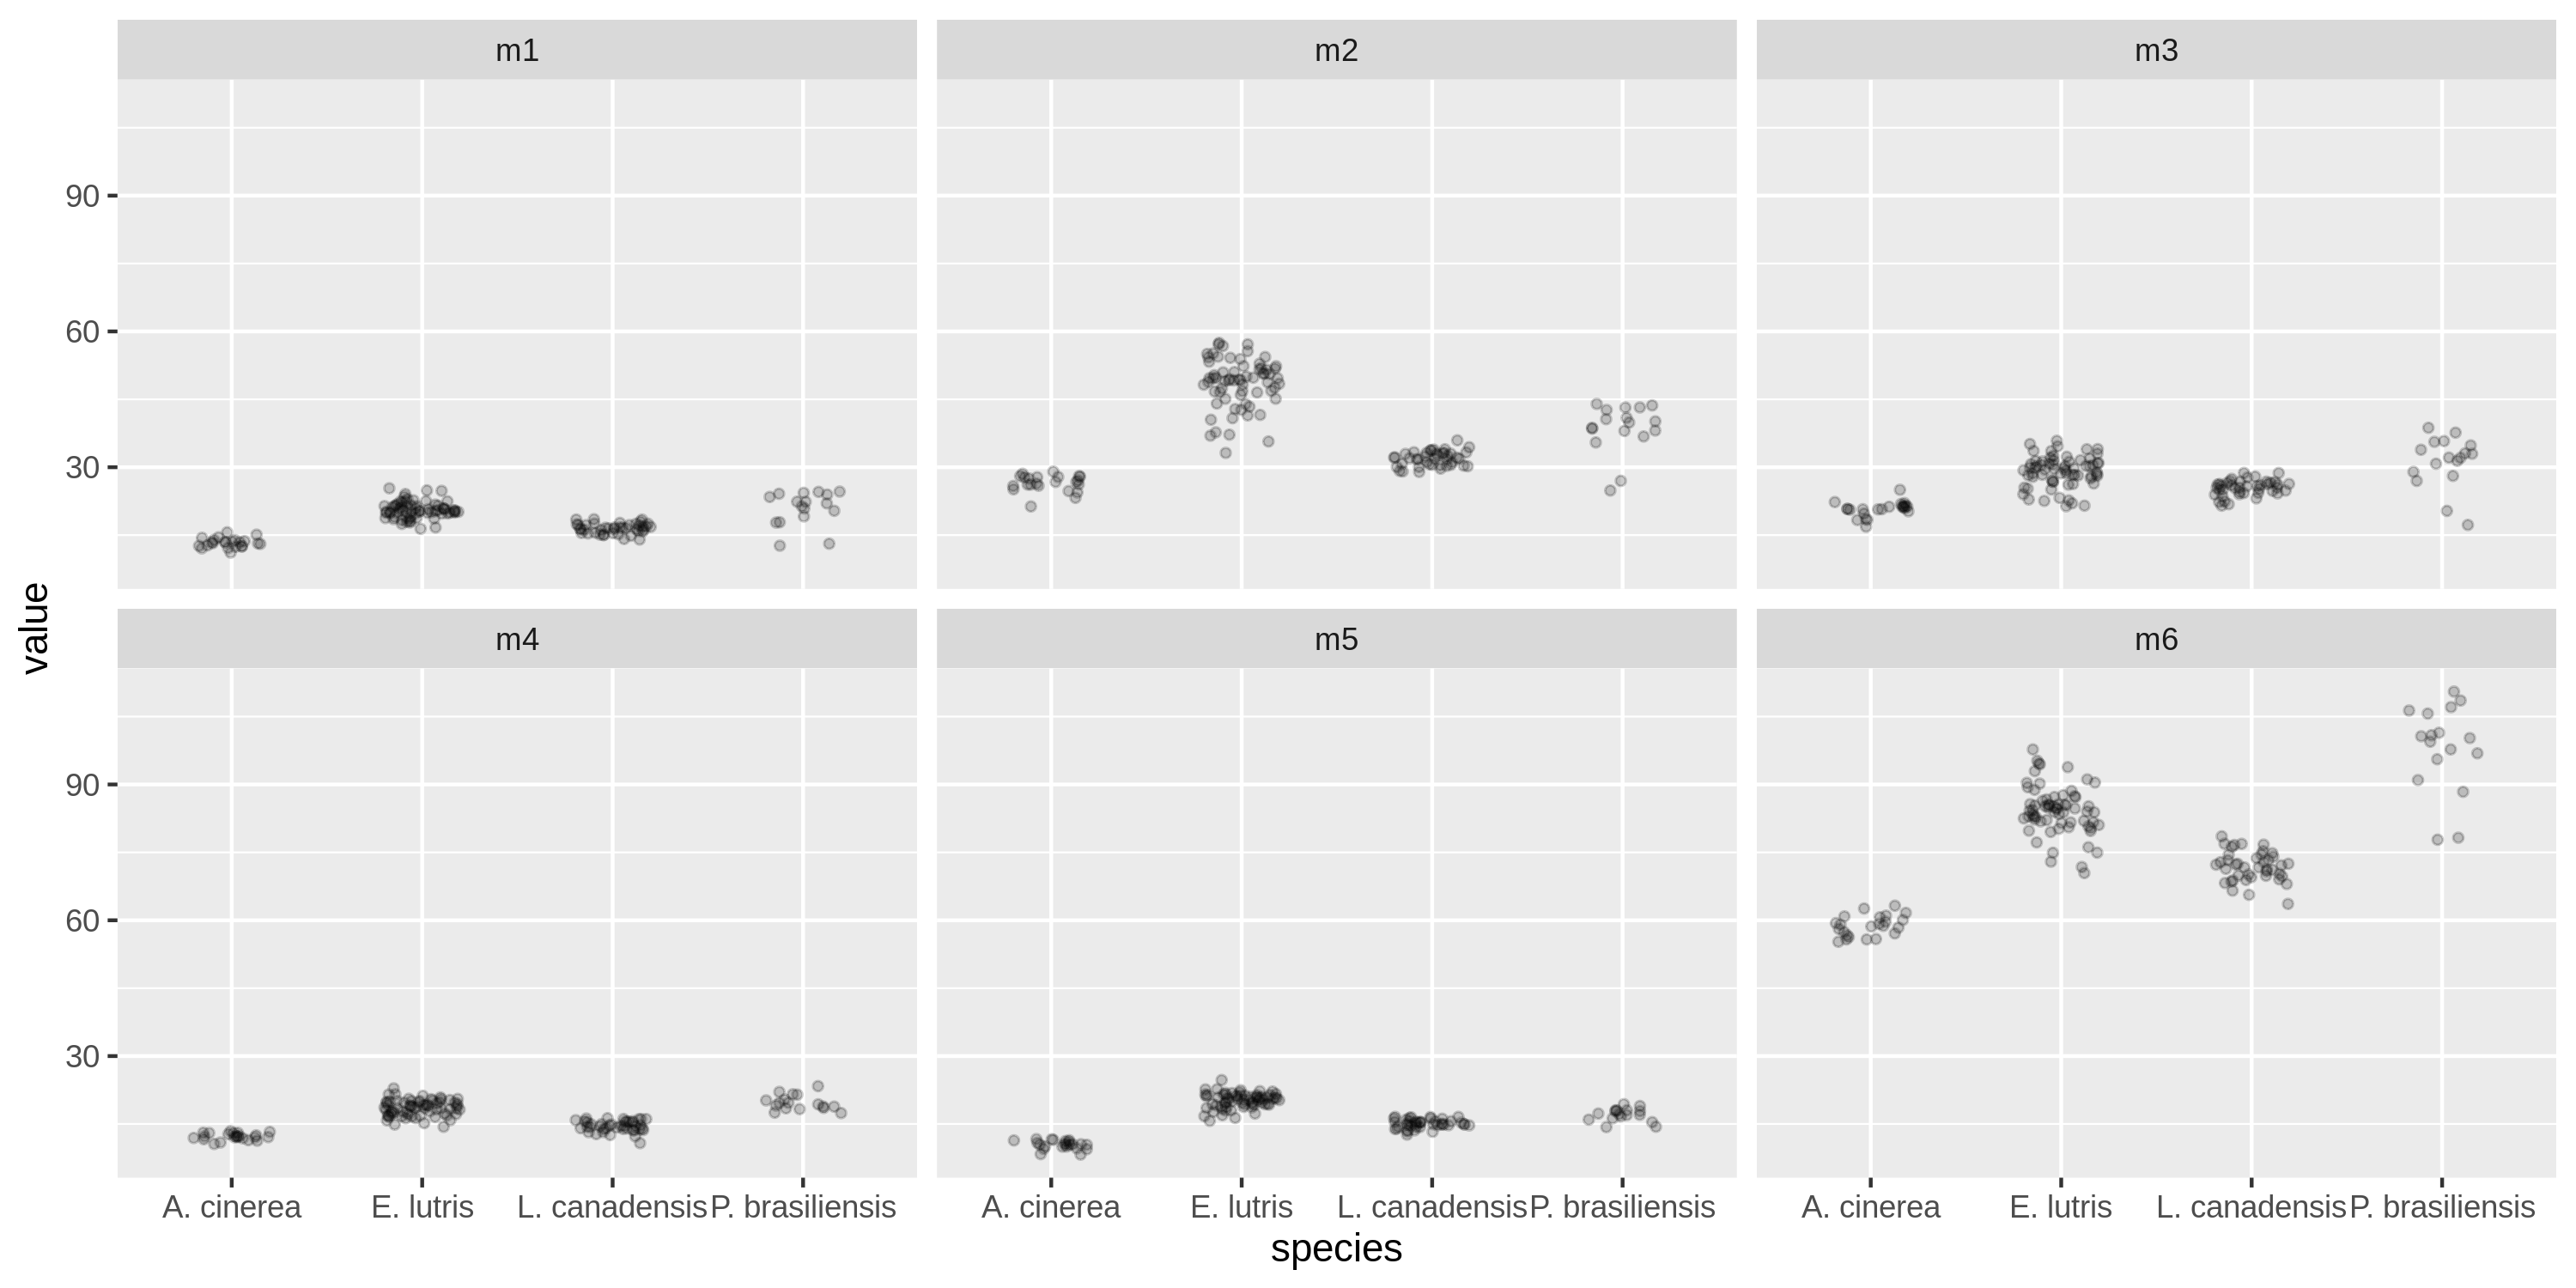

In [8]:
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 300)

z=ggplot(otter.data, aes(x=species,y=value))
z=z+geom_point(position=position_jitter(h=0,w=0.2), size=1, alpha=0.2)
z=z+facet_wrap(~characteristic)
z

Make the axis test legible by rotating the text 45 degrees.

Warning message:
“Removed 5 rows containing missing values (geom_point).”


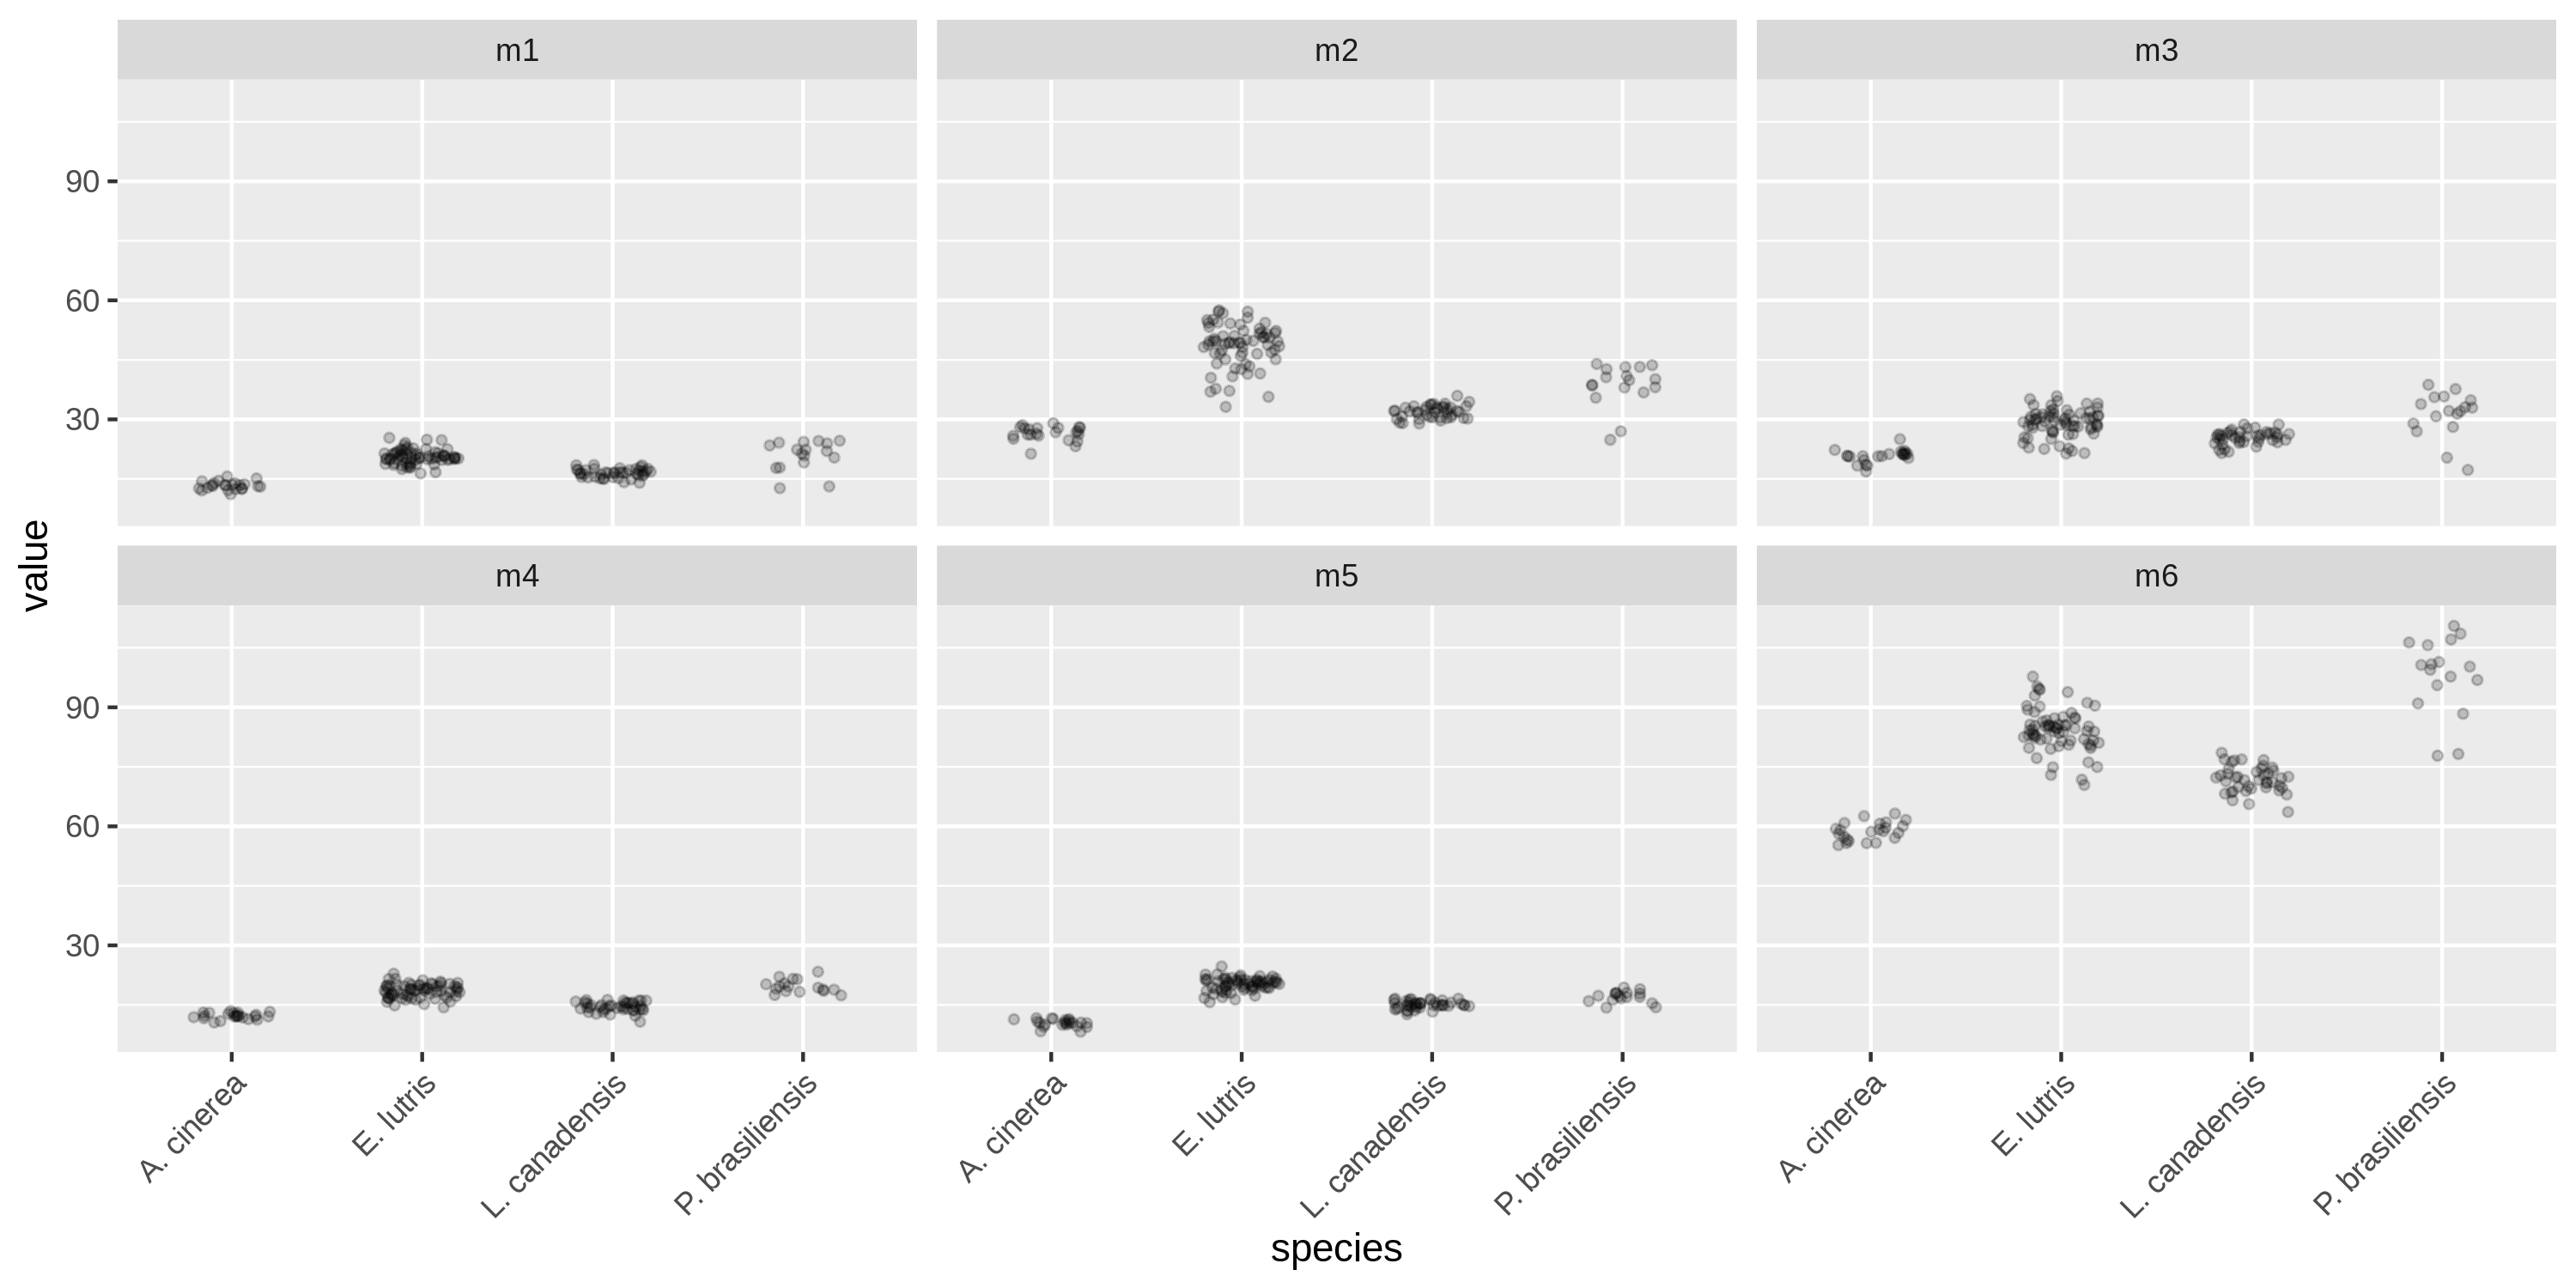

In [9]:
z=z+theme(axis.text.x = element_text(angle = 45, hjust = 1))
z

What happens if you pass the argument `scales='free_y` to `facet_wrap`?

Warning message:
“Removed 5 rows containing missing values (geom_point).”


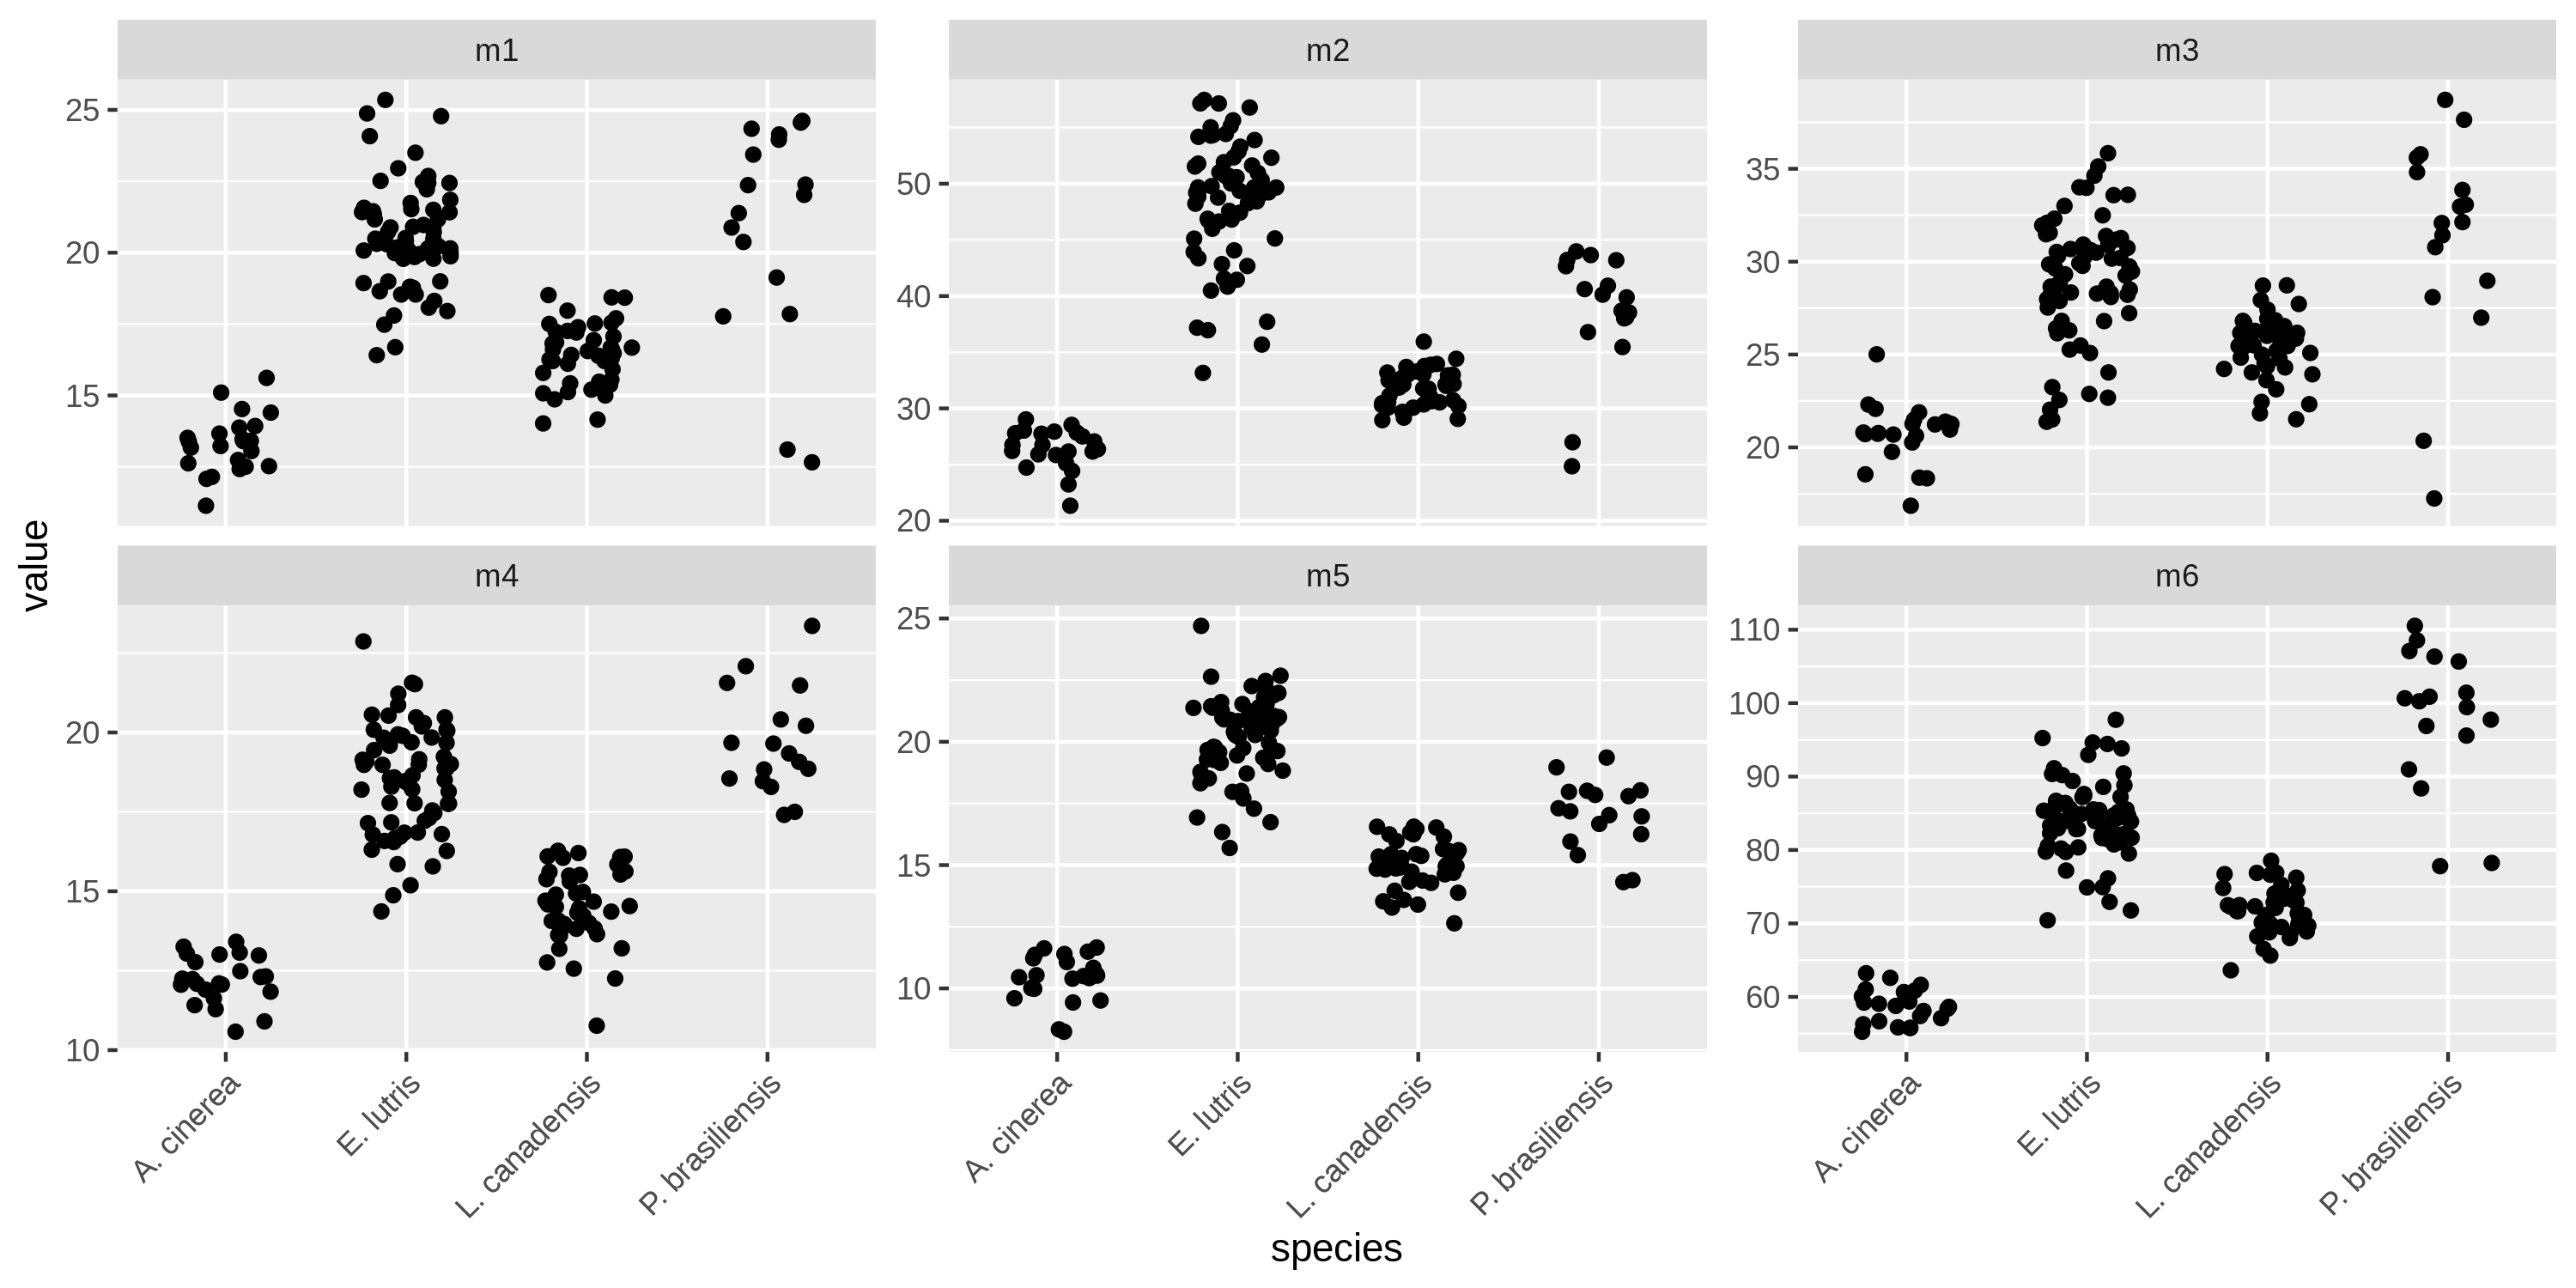

In [11]:
w=ggplot(otter.data, aes(x=species,y=value))
w=w+geom_point(position=position_jitter(h=0, w=0.25))
w=w+facet_wrap(~characteristic, scales='free_y')
w=w+theme(axis.text.x = element_text(angle = 45, hjust = 1))
w

Do you prefer the heatmap or the point+jitter plot?

I prefer the heatmap